<a href="https://colab.research.google.com/github/Distortedlogic/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Jeremy_Meek_LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import pandas as pd
import matplotlib.pyplot as plt

URL = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv'
df = pd.read_csv(URL)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']

final = lastday_filtered.tail(1)

pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

plot_data = final[pct_columns].T
plot_data.index = range(1, 11)

<Figure size 432x288 with 0 Axes>

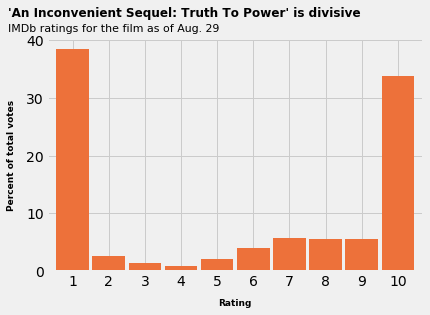

In [99]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = plot_data.plot.bar(color="#ED713A", width=0.9)

fig.patch.set(facecolor='white')
ax.set(facecolor='white')
ax.patch.set_alpha(0)

ax.text(x=-1.8, y=44, s="'An Inconvenient Sequel: Truth To Power' is divisive", fontweight='bold', fontsize=12);
ax.text(x=-1.8, y=41.5, s="IMDb ratings for the film as of Aug. 29", fontsize=11)

ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold', labelpad=10)
ax.set_xlabel("Rating", fontsize=9, fontweight='bold', labelpad=10)

ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0, 50, 10))

ax.get_legend().remove()

plt.show()

In [0]:
URL = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/marriage/both_sexes.csv'
marriage = pd.read_csv(URL)

Here is the plot that I am attempting to replicate.

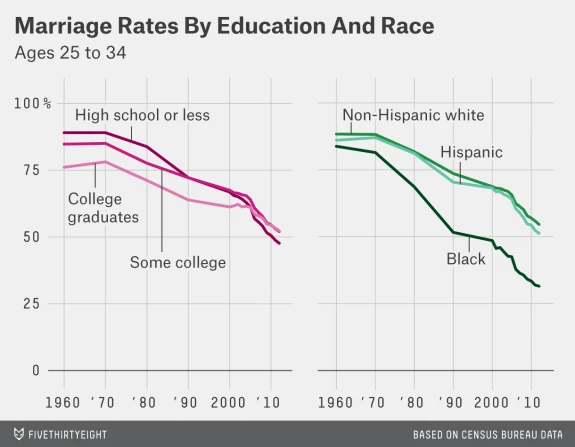

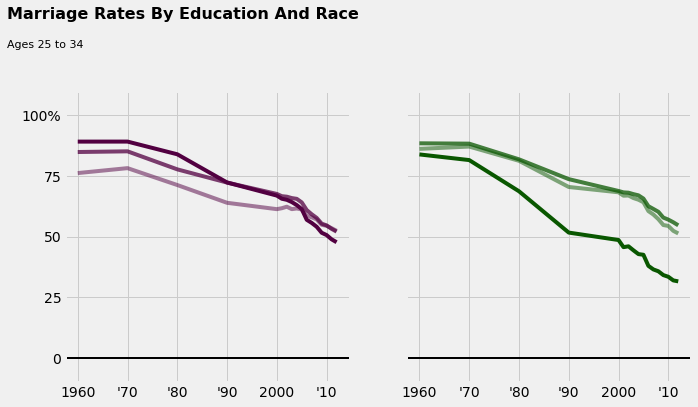

In [115]:
'''
I believe I replicated all major and minor features of the graph, excluding tedious annotations.
All that is left would be very fine detailed tuning of parameters.
I leave this as an exercise for the reader. XP
'''

def process(i):
  return (10_000*(1-i)).round()/100

EDUCATION = ['HS_2534', 'SC_2534', 'BAp_2534']
RACE = ['Hisp_2534', 'White_2534', 'Black_2534']

EDU_dict = {'HS_2534':'High school or less',
            'SC_2534':'Some college',
            'BAp_2534':'College graduates'}
RACE_dict = {'Hisp_2534':'Hispanic',
             'White_2534':'Non-Hispanic white',
             'Black_2534':'Black'}

E_COLORS = ['#520041FF', '#520041BF', '#52004180']
R_COLORS = ['#095700FF', '#095700BF', '#09570080']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

for edu, color in zip(EDUCATION, E_COLORS):
  ax[0].plot(marriage['year'], process(marriage[edu]), color=color)
  #ax[0].annotate(EDU_dict[edu], xy=(0, 0))
  '''
  I was trying to add an annotation for each plot on the subplot with the above commented out line.
  Regardless of my choice of parameters, I could not get an annotation to display.
  An alternative would be to use .text().
  I am going to work on my portfolio project instead of worry about this annotation aspect.
  '''

for race, color in zip(RACE, R_COLORS[::-1]):
  ax[1].plot(marriage['year'], process(marriage[race]), color=color)

fig.text(x=0, y=1.08, s='Marriage Rates By Education And Race', fontweight='bold', fontsize=16);
fig.text(x=0, y=1, s='Ages 25 to 34', fontsize=11)

for axis in ax:
  axis.set_xticks(range(1960,2020,10))
  axis.set_xticklabels([1960, "'70", "'80", "'90", 2000, "'10"])
  axis.set_yticks(range(0, 125, 25))
  axis.set_yticklabels([*range(0, 100, 25), '100%'])
  axis.set_ylim([-10,110])
  axis.axhline(linewidth=2, color="black")

ax[1].set_yticklabels('')

plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# I am working on my portfolio project instead of stretch goals